# Exercise 1

We first consider **scipy.stats**' *uniform* RNG to generate several sequences of length $n_i$. For this exercise seciton, we consider the uniform distribution $U(0,1)$.

In [14]:
## -------------------- Import necesary libraries --------------------
from scipy.stats import uniform, chi2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## -------------------- Define parameters --------------------
# Sample sizes
sample_sizes = [45, 100, 10**3, 10**5] 

# Uniform distribution parameters U(0,1)
loc = 0
scale = 1

## **Part** *(1.a)*:

In this following snippet, we plot the theoretical Cummulative Distribution Function (CDF) $F(x) = 0 \text{ for } x < a, F(x) = (x - a) / (b - a) \text{ for a } ≤ x ≤ b \text{, and } F(x) = 1 \text{ for } x > b$ and compare it to the empirical CDF $\hat{F}(x)$.

In [5]:
## -------------- Define Theoretical CDF -------------------
X = np.linspace(loc, loc + scale, 10000)
cdf_theorical = uniform.cdf(X, loc=loc, scale=scale)

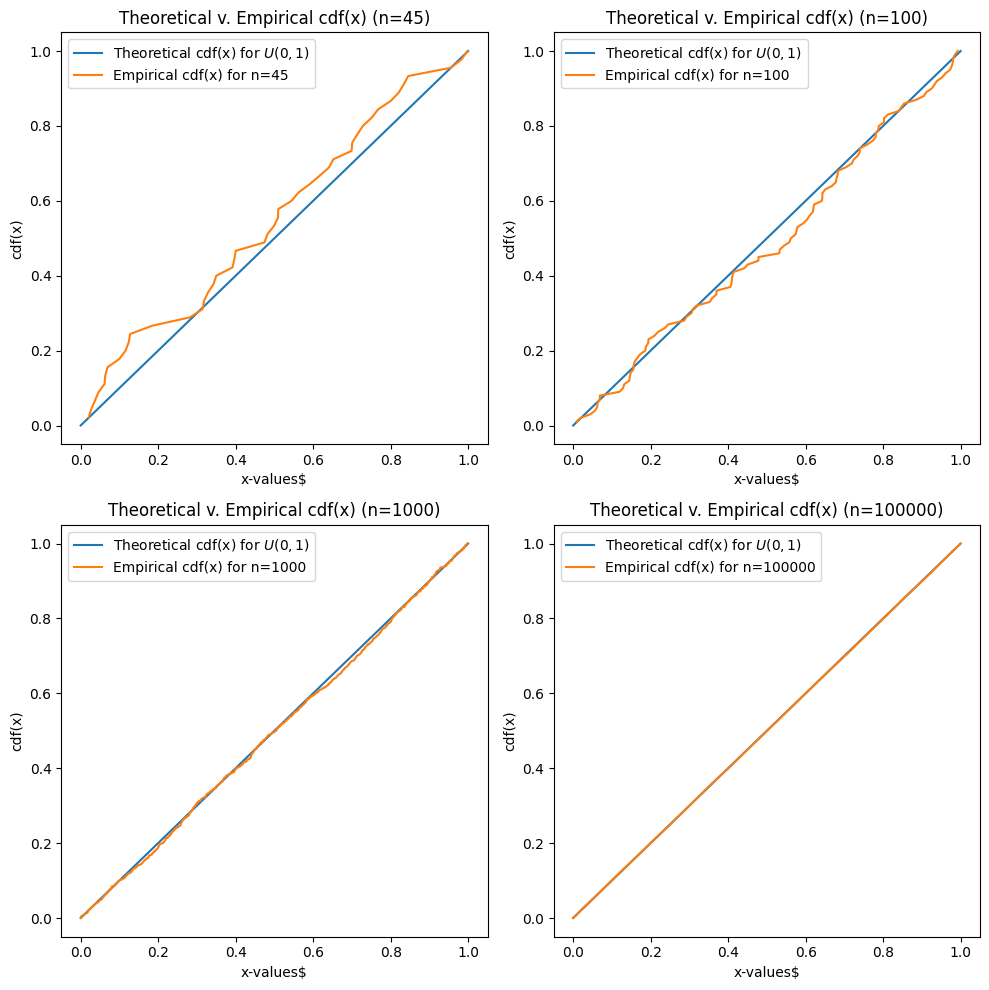

In [10]:
## -------------- Define Empirical CDF & Plot -----------------
fig, ax = plt.subplots(2, 2, figsize=(10,10)) # 2x2 Figure (since we have 4 sequences)
ax = ax.flatten()

for i, n in enumerate(sample_sizes):
    # Generate n random numbers from U(0,1)
    random_numbers = uniform.rvs(loc=loc, scale=scale, size=n)

    # Define empirical CDF
    x_Ecdf = np.sort(random_numbers) # Sort "randomized" values
    y_Ecdf = np.arange(1,n+1)/n # Create equispaced range for y-axis (1/n, ..., n/n+1)

    # Plot
    ax[i].plot(X, cdf_theorical, label="Theoretical cdf(x) for $U(0,1)$")
    ax[i].plot(x_Ecdf, y_Ecdf, label=f"Empirical cdf(x) for n={n}")

    # Plot configuration: Subplots
    ax[i].set_title(f"Theoretical v. Empirical cdf(x) (n={n})")
    ax[i].set_xlabel("x-values$")
    ax[i].set_ylabel("cdf(x)")
    ax[i].legend()

plt.tight_layout()
plt.show()

## **Part** *(1.b)*:

We now implement that which is our most basic goodness-of-fit test, the Q-Q plot.

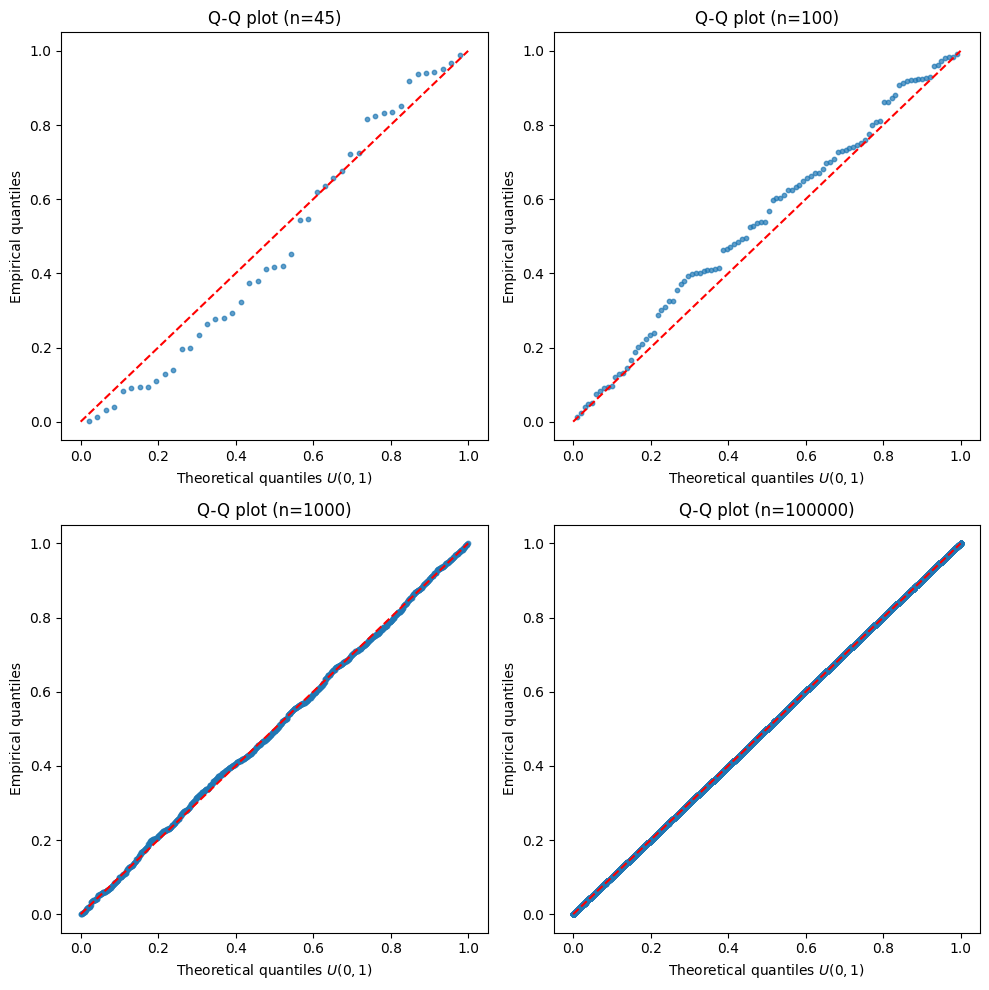

In [11]:
## ------------ Define and Create Plot --------------
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax = ax.flatten()

for i, n in enumerate(sample_sizes):
    # Generate "random" data (this serves as our empirical quantiles acording to the theory)
    random_numbers = uniform.rvs(loc=loc, scale=scale, size=n)
    E_quantiles = np.sort(random_numbers)

    # Calcualte theoretical quantiles
    probabilities = (np.arange(n) + 1) / (n + 1) # Create n probabilistic points equispaced on (0,1)
    T_quantiles = uniform.ppf(probabilities, loc=loc, scale=scale) # Use cdf^{-1}(x) (the inverse of CDF) in order to find the theoretical value for each probability

    # Plot
    ax[i].scatter(T_quantiles, E_quantiles, s=10, alpha=0.7)

    # Draw a reference line (in this case y=x)
    line_range = np.array([0,1])
    ax[i].plot(line_range, line_range, 'r--', label='Reference line ($y=x$)')

    # Plot configuration: Subplots
    ax[i].set_title(f"Q-Q plot (n={n})")
    ax[i].set_xlabel("Theoretical quantiles $U(0,1)$")
    ax[i].set_ylabel("Empirical quantiles")

# Adjust equispaced subplots
plt.tight_layout()
plt.show()
    

## **Part** *(2)*:

We now implement the Kolmogorov–Smirnov test to ascertain whether the empirical CDF of $U_1, \ldots, U_n$ matches the theoretical CDF of the $U(0,1)$ distribution at level $\alpha = 0.1$, i.e., we reject the null hypothesis $H_0$ at level $\alpha > 0$ that the sample $U_1, \ldots, U_n \sim U(0,1)$ if $\sqrt(n)D_n > K_{\alpha, n}$, where $D_n = \text{sup}_{x \in \mathbb{R}}\mid \hat{F}(x) - F(x) \mid$, and $K_{\alpha, n}$ is such that $\mathbb{P}(\sqrt(n)D_n > K_{\alpha, n}) < \alpha$.

In [19]:
## ---------- General parameters for K-S Test ---------------
ks_critical_values = {
    20 : 1.03, # alpha = 0.1 : 1.57; = 0.2 : 1.03; = 0.05 : 1.03 
    30 : 1.31, # alpha = 0.1 : 1.59; = 0.2 : 1.04; = 0.05 : 1.31
    35 : 1.36, # alpha = 0.1 : 1.60; = 0.2 : 1.06; = 0.05 : 1.36
    40 : 1.33, # alpha = 0.1 : 1.58; = 0.2 : 1.08; = 0.05 : 1.33
    45 : 1.34, # alpha = 0.1 : 1.61; = 0.2 : 1.07; = 0.05 : 1.34
    'large_n' : 1.63 # for n > 45
}

alpha = 0.05

In [20]:
## ------------- Manual KS test & Plot ---------------------
for n in sample_sizes:
    random_numbers = uniform.rvs(loc=loc, scale=scale, size=n)
    random_numbers_sorted = np.sort(random_numbers)

    F_theoretical = random_numbers_sorted # Theoretical CDF in each one of our data points; For U(0,1), F(x) = x
    i = np.arange(1, n+1) # Represents the 'steps' of the empirical CDF

    D_plus = np.max((i/n) - F_theoretical)
    D_minus = np.max(F_theoretical - ((i - 1) / n))
    D_n = max(D_plus, D_minus)
    scaled_Dn = np.sqrt(n) * D_n

    if n <= 45:
        closest_n = min(ks_critical_values.keys(), key=lambda k:float('inf') if isinstance(k, str) else abs(k-n))
        K_alpha_n = ks_critical_values[closest_n]
    else:
        K_alpha_n = ks_critical_values['large_n']

    # Realize hypothesis test
    print(f"\nSample size n = {n}")
    print(f"Test statistic ($sqrt(n)*D_n$): {scaled_Dn:.4f}")
    print(f"Critical value ($K_{alpha,n}$): {K_alpha_n:.4f}")

    if scaled_Dn > K_alpha_n:
        print("  Result: $H_0$ is rejected i.e. the sample does not follow a distribution U(0,1).")
    else:
        print("  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).")


Sample size n = 45
Test statistic ($sqrt(n)*D_n$): 0.5608
Critical value ($K_(0.05, 45)$): 1.3400
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 100
Test statistic ($sqrt(n)*D_n$): 1.4032
Critical value ($K_(0.05, 100)$): 1.6300
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 1000
Test statistic ($sqrt(n)*D_n$): 0.7321
Critical value ($K_(0.05, 1000)$): 1.6300
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 100000
Test statistic ($sqrt(n)*D_n$): 1.5716
Critical value ($K_(0.05, 100000)$): 1.6300
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).


## **Part** *(3)*:

Finally, we would like to test for independence. We'll use the $\Chi^2$ test in this case.

In [22]:
## -------------------- Chi^2 Test -------------------
k = 20 # number of bins

for n in sample_sizes:
    random_numbers = uniform.rvs(loc=loc, scale=scale, size=n)

    observed_frequencies, _ = np.histogram(random_numbers, bins=k, range=(0,1))
    expected_frequency = n / k

    chi2_statistic = np.sum((observed_frequencies - expected_frequency) ** 2 / expected_frequency)

    deg_freedom = k - 1
    critical_value = chi2.ppf(1 - alpha, df=deg_freedom)

    # Realize hypothesis test
    print(f"\nSample size n = {n}")
    print(f"Test statistic : {chi2_statistic:.4f}")
    print(f"Critical value: {critical_value:.4f} (with {deg_freedom} degrees of freedom)")

    if chi2_statistic > critical_value:
        print("  Result: $H_0$ is rejected i.e. the sample does not follow a distribution U(0,1).")
    else:
        print("  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).")


Sample size n = 45
Test statistic : 23.8889
Critical value: 30.1435 (with 19 degrees of freedom)
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 100
Test statistic : 15.2000
Critical value: 30.1435 (with 19 degrees of freedom)
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 1000
Test statistic : 33.0800
Critical value: 30.1435 (with 19 degrees of freedom)
  Result: $H_0$ is rejected i.e. the sample does not follow a distribution U(0,1).

Sample size n = 100000
Test statistic : 28.4680
Critical value: 30.1435 (with 19 degrees of freedom)
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).


# Exercise 2

We would now proceed to implement the linear congruential generator (LCG)
$$X_k = (aX_{k−1} + b) \text{ mod } m \text{ , } U_k ∶= \frac{X_k}{m}$$
with $a = 3$, $b = 0$, and $m = 31$.

In [23]:
## --------------- Defining LCG --------------
def lcg(n, seed=7):
    """
    Implementation of Linear Congruential Generator (LCG)

    Args:
    n (int): Number of samples to generate
    seed (int): Initial permutation state

    Returns:
    np.array: Sequence of lenght n "randomly" generated by LCG
    """

    # Define general parameters for LCG
    a = 3
    b = 0
    m = 31

    u = np.zeros(n)

    # Establish the seed
    x = seed

    # Recursion
    for i in range(n):
        x = (a * x + b) % m
        u[i] = x / m

    return u